# Finding Optimum k using Elbow Method and  Silhoutte Score

- DataSet Customer Segmentation

In [46]:
#importing  modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Loading DataSet
data = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\BIA PROJECT\customer_segmentation.csv')
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [48]:
#Copying DataSet
df = data.copy()
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [49]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [50]:
#Checking duplicate value
df[df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [51]:
# Dropping irrelevent columns: 
df.drop(columns = ['ID', 'Var_1', 'Segmentation', ], axis=1, inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [52]:
# Checking Null Value 
df.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

In [53]:
# Drop Null Value

df.dropna(inplace = True)

In [54]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [55]:
#Non-numeric column
non_numeric_column = df.select_dtypes(include = object).columns.to_list()
print('The non-numeric columns are: \n', non_numeric_column)

The non-numeric columns are: 
 ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']


In [56]:
# Getting dummy values

df = pd.get_dummies(df , columns = non_numeric_column, dtype = int , drop_first = True)
df.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,67,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,67,0.0,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0
5,56,0.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,32,1.0,3.0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [57]:
#Scalling 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [58]:
#model = KMeans(n_clusters = 3 , random_state = 42)
#model.fit(df_scaled)
#model.labels_

In [67]:
## Elbow method and silhoutte score

wcss = []
silhouette = []
k = range(2,11)

## Applying KMeans in loop

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df_scaled)
    #df['Segment'] = model.predict(df_scaled)
    wcss.append(model.inertia_)
    ## Silhoutte score
    score = metrics.silhouette_score( X = df_scaled , labels = model.labels_)
    silhouette.append(score)


In [72]:
#printing  wcss & silhoutte

## Printing wcss & silhoutte score

print(f'The value of inertia is : {wcss}')
print(f'The silhouette score is :{silhouette}')

The value of inertia is : [132741.7464001796, 111928.63477986377, 102175.85235626315, 92833.82052787104, 84252.71720528565, 75416.55534338192, 66228.01854391818, 59515.80706480511, 57717.13712111245]
The silhouette score is :[np.float64(0.34416761697148784), np.float64(0.14360215764981846), np.float64(0.17166411781789256), np.float64(0.20673156380574895), np.float64(0.23864755100155735), np.float64(0.25531370182955115), np.float64(0.28372705488067945), np.float64(0.275516786868917), np.float64(0.2979261602187326)]


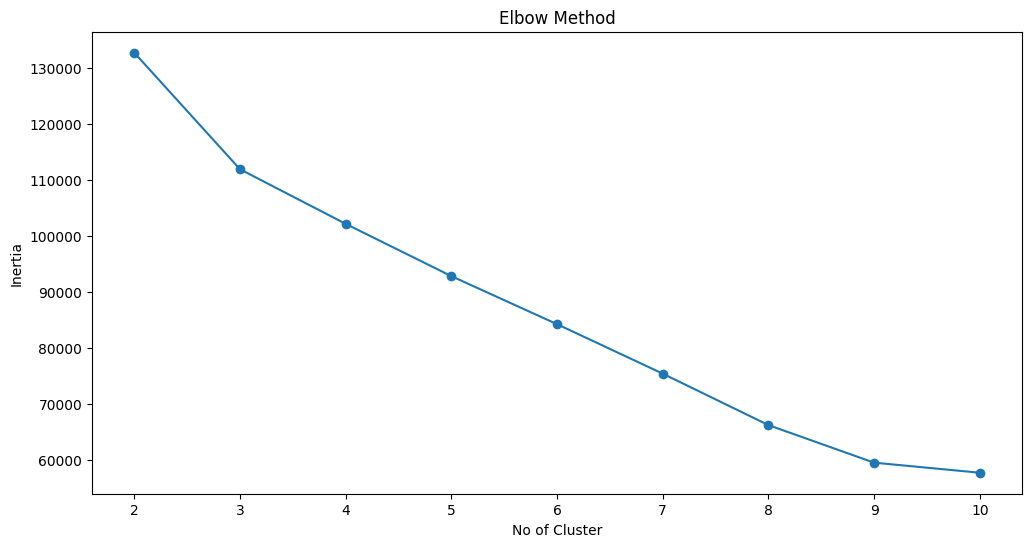

In [73]:
#Elbow method plot
plt.figure(figsize = (12,6))
plt.plot(k, wcss , marker = 'o')
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

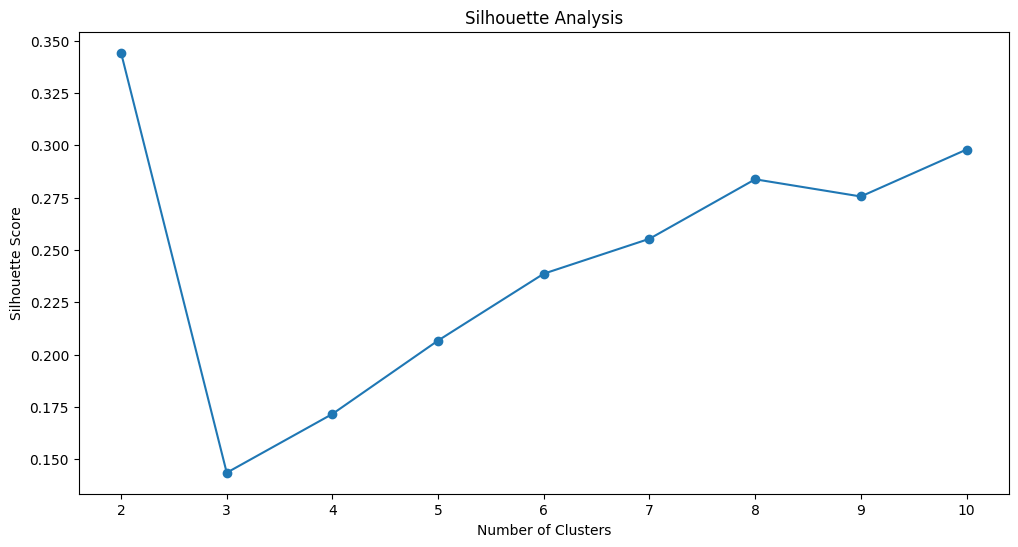

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k, silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()